In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, sin, atan, cos, tan, Eq, solve, nsolve, linsolve, nonlinsolve
import math

# Part a

## Finding Minimum Mach Number and Maximum Beta

- Assuming the M1 has to minimally 1 
- This is to ensure the Normal Shock can still occur downstream
- Done by equating the oblique shock equation with the self derived equation

In [2]:
M_inf, M1, M2, beta = symbols(['M0', 'M1', 'M2', 'B'])
theta = np.radians(10)

In [3]:
# Equation 1
top = (5 + ((M_inf)**2) * (sin(beta)**2))
bottom = 7 * (M_inf**2) * (sin(beta)**2) -1 
LHS = top / bottom
RHS = sin(beta-theta)**2
first = Eq(LHS, RHS)
first

Eq((M0**2*sin(B)**2 + 5)/(7*M0**2*sin(B)**2 - 1), sin(B - 0.174532925199433)**2)

In [4]:
# Equation 2
top2 = ((M_inf**2) * (sin(beta)**2)) - 1
bottom2 = (M_inf**2) * (1.4 + cos(2*beta)) + 2
side = 2 / tan(beta)
RHS2 = side * (top2/bottom2)
second = Eq(tan(theta), RHS2)
second

Eq(0.176326980708465, 2*(M0**2*sin(B)**2 - 1)/((M0**2*(cos(2*B) + 1.4) + 2)*tan(B)))

In [5]:
sol = nsolve([first, second],[beta, M_inf], [-2,2])

print('The maximum Beta angle is:', (180 + np.degrees(float(sol[0]))))
print('The minimum Mach Number is: ', sol[1])

The maximum Beta angle is: 62.871347895208345
The minimum Mach Number is:  1.43616581024729


## Solving for Maximum Mach Number
- Beta(Minimum) gives maximum Mach Number

In [6]:
b = np.radians(18.435) # Beta(minimum) gives maximum mach number

top2 = ((M_inf**2) * (sin(b)**2)) - 1
bottom2 = (M_inf**2) * (1.4 + cos(2*b)) + 2
side = 2 / tan(b)
RHS2 = side * (top2/bottom2)
#eqn_2 = tan(10) - RHS2

second = Eq(tan(theta), RHS2)
second
max_mach = solve(second)

print('Maximum Mach Number is:', max_mach[1])
print('\n')
second

Maximum Mach Number is: 5.47299204741344




Eq(0.176326980708465, 5.99998213587762*(0.100000535925746*M0**2 - 1)/(2.19999892814851*M0**2 + 2))

## For Mach number 2 & 3 : Find the Beta --> to Sub in the beta and get the Length

In [7]:
M2 = 2

top2 = ((M2**2) * (sin(beta)**2)) - 1
bottom2 = (M2**2) * (1.4 + cos(2*beta)) + 2
side = 2 / tan(beta)
RHS2 = side * (top2/bottom2)

second = Eq(tan(theta), RHS2)
beta_2 = np.degrees(float(nsolve(second, (-1,1))))

print('Corresponding Beta Angle is (Solving equation below):', beta_2)
print('\n')
second

Corresponding Beta Angle is (Solving equation below): 39.313931844818875




Eq(0.176326980708465, 2*(4*sin(B)**2 - 1)/((4*cos(2*B) + 7.6)*tan(B)))

In [8]:
M3 = 3

top2 = ((M3**2) * (sin(beta)**2)) - 1
bottom2 = (M3**2) * (1.4 + cos(2*beta)) + 2
side = 2 / tan(beta)
RHS2 = side * (top2/bottom2)

second = Eq(tan(theta), RHS2)
beta_3 = np.degrees(float(nsolve(second, (-1,1))))

print('Corresponding Beta Angle is (Solving equation below):', beta_3)
print('\n')
second

Corresponding Beta Angle is (Solving equation below): 27.382690621308473




Eq(0.176326980708465, 2*(9*sin(B)**2 - 1)/((9*cos(2*B) + 14.6)*tan(B)))

## For Mach number 2 & 3 : Find Overall Pressure Ratio

Algorithm as followed:
  
1. Get Mach Infinity Normal
2. Get Mach 1 Normal
3. Get Mach 1
4. Get Pressure Ratio 1 / Infinity
5. Get Pressure Ratio Total 1 / Total Infinity
6. Get M2
7. Get Pressure Ratio 2 / 1
8. Get Pressure Ratio Total 2 / Total 1
9. Get Pressure ratio Total 2 / Total Infinity

In [9]:
def get_pressure_ratio(beta, Minf):

    # Get Mach Infinity Normal
    Minf_n = Minf * sin(np.radians(beta))

    # Get Mach 1 Normal
    M1_n = ((5 + (Minf_n**2)) / (7*(Minf_n**2)-1))**0.5  

    # Get Mach 1
    M1 = M1_n / sin(np.radians(beta-10)) 

    # Get Pressure Ratio 1 / Infinity
    P1inf = ((7 * (Minf_n**2))-1) / 6

    # Get Pressure Ratio Total 1 / Total Infinity
    P010inf = P1inf * ((2 + (1.4-1)*(M1**2)) / (2 + (1.4-1)*(Minf**2)))**3.5

    # Get M2
    M2 = ((5 + M1**2) / ((7*(M1**2)) - 1))**0.5

    # Get Pressure Ratio 2 / 1
    P21 = ((7 * (M1**2))-1) / 6

    # Get Pressure Ratio Total 2 / Total 1
    P0201 = P21 * ((2 + (1.4-1)*(M2**2)) / (2 + (1.4-1)*(M1**2)))**3.5


    # Get Pressure ratio Total 2 / Total Infinity
    final = P0201 * P010inf * (((2 + (1.4-1)*(Minf**2)) / (2 + (1.4-1)*(M2**2)))**3.5)

    return final

In [10]:
print('The pressure ratio for Mach 3 is :', float(get_pressure_ratio(beta_3, 3)))
print('The pressure ratio for Mach 2 is :', float(get_pressure_ratio(beta_2, 2)))

The pressure ratio for Mach 3 is : 14.698104308638323
The pressure ratio for Mach 2 is : 5.073997311585265


__________________________________________________________________________________________________________

# Part b

**Procedure as followed**
1. Getting a range of values between Mach 2 to Max Mach (5.472)
2. From the Mach Numbers, get their respective Beta Angles (using oblique shock equations)
3. Upon getting Beta Angles, sub in to part a) function to get pressure ratios
4. Plot Graph

In [11]:
M_inf, M1, M2, beta = symbols(['M0', 'M1', 'M2', 'B'])
theta = np.radians(10)

mach = np.linspace(2, 5.473, 50)

In [12]:
# Equation 2
betas = []
for m in mach:
    # Equation
    top2 = ((m**2) * (sin(beta)**2)) - 1
    bottom2 = (m**2) * (1.4 + cos(2*beta)) + 2
    side = 2 / tan(beta)
    RHS2 = side * (top2/bottom2)
    second = Eq(tan(theta), RHS2)
    # To solve
    b = np.degrees(float(nsolve(second, (-1,1))))
    # appending to the list
    betas.append(b)

In [13]:
pressure_ratios = []

for b, m in zip(betas, mach):
    x = get_pressure_ratio(b, m)
    pressure_ratios.append(x)

In [15]:
betas

[39.313931844818875,
 37.95449492994711,
 36.719730760950064,
 35.59154219193148,
 34.555531546974514,
 33.60002420990424,
 32.715404218504766,
 31.893646658063037,
 31.127979202942825,
 30.412631273608355,
 29.742644335243796,
 29.113725911608125,
 28.5221355198768,
 27.964594348014792,
 27.438212881168674,
 26.940432294688385,
 26.468976543146923,
 26.021812856627186,
 25.597118914949153,
 25.19325537697017,
 24.80874274160004,
 24.44224174071741,
 24.09253663298779,
 23.758520896446296,
 23.439184917054593,
 23.13360534773743,
 22.840935873057134,
 22.560399162654477,
 22.29127983480414,
 22.032918282093977,
 21.784705235992668,
 21.546076967179193,
 21.316511034934344,
 21.09552251238509,
 20.882660625528665,
 20.677505753198282,
 20.479666742826858,
 20.288778503302318,
 20.104499841616096,
 19.92651151456709,
 19.754514470643574,
 19.588228260484442,
 19.427389597115646,
 19.27175104954675,
 19.121079855361646,
 18.97515683969947,
 18.83377542954228,
 18.69674075354015,
 18.56386

In [17]:
betas = np.array(betas)
betas

array([39.31393184, 37.95449493, 36.71973076, 35.59154219, 34.55553155,
       33.60002421, 32.71540422, 31.89364666, 31.1279792 , 30.41263127,
       29.74264434, 29.11372591, 28.52213552, 27.96459435, 27.43821288,
       26.94043229, 26.46897654, 26.02181286, 25.59711891, 25.19325538,
       24.80874274, 24.44224174, 24.09253663, 23.7585209 , 23.43918492,
       23.13360535, 22.84093587, 22.56039916, 22.29127983, 22.03291828,
       21.78470524, 21.54607697, 21.31651103, 21.09552251, 20.88266063,
       20.67750575, 20.47966674, 20.2887785 , 20.10449984, 19.92651151,
       19.75451447, 19.58822826, 19.4273896 , 19.27175105, 19.12107986,
       18.97515684, 18.83377543, 18.69674075, 18.56386882, 18.43498576])

In [18]:
length = 0.1 / np.tan(np.radians(betas))
length 

array([0.12211553, 0.12820391, 0.13406392, 0.13972209, 0.14519922,
       0.15051196, 0.15567393, 0.16069643, 0.16558902, 0.17035981,
       0.17501586, 0.1795633 , 0.18400753, 0.18835334, 0.19260505,
       0.1967665 , 0.20084123, 0.20483243, 0.20874304, 0.21257577,
       0.21633313, 0.22001746, 0.22363095, 0.22717563, 0.23065345,
       0.23406621, 0.23741563, 0.24070335, 0.24393093, 0.24709985,
       0.25021152, 0.25326731, 0.25626851, 0.25921637, 0.2621121 ,
       0.26495687, 0.26775178, 0.27049793, 0.27319636, 0.27584808,
       0.27845408, 0.28101531, 0.2835327 , 0.28600715, 0.28843952,
       0.29083068, 0.29318144, 0.29549262, 0.297765  , 0.29999936])

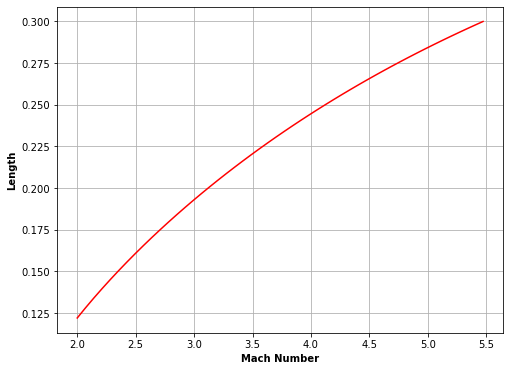

In [21]:
plt.figure(figsize=(8,6))
plt.plot(mach, length, color='red')
plt.grid(True)
plt.xlabel('Mach Number', weight='bold')
plt.ylabel('Length', weight='bold')
plt.show()

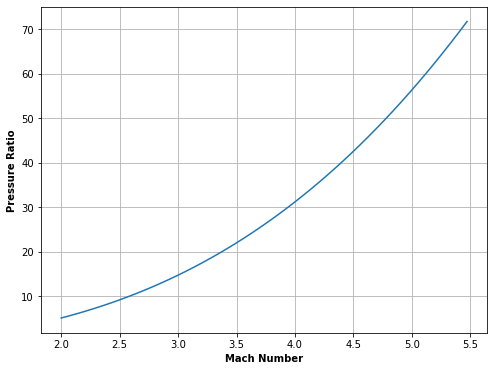

In [32]:
plt.figure(figsize=(8,6))
plt.plot(mach,pressure_ratios)
plt.grid(True)
plt.xlabel('Mach Number', weight='bold')
plt.ylabel('Pressure Ratio', weight='bold')
plt.show()